In [1]:
#importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv"
df=pd.read_csv(path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#voir les valeurs manquantes
a=df.isna().sum()
b=df.isna().sum().sum()
print("Nombre total de valeurs manquantes=",b)
print("\nNombre de valeurs manquantes pour chaque attribut= ")
a

Nombre total de valeurs manquantes= 149

Nombre de valeurs manquantes pour chaque attribut= 


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [6]:
l_num=list(df.select_dtypes(include='number'))
l_discret=list(df.select_dtypes(include='object'))
print('l_num=',l_num)
print('l_discret=',l_discret)

l_num= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
l_discret= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [7]:
df_num=df[l_num]
df_discret=df[l_discret]

##Data Cleaning

In [8]:
#traitement des valeurs manquantes pour les variables categoriques: on va les remplacer par l'element le plus fréquent
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[l_discret]=mf_imputer.fit_transform(df[l_discret])

In [9]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#df.loc[:,l_num].bfill(inplace=True)
df['LoanAmount'].fillna(method='bfill', inplace=True)
df['Loan_Amount_Term'].bfill(inplace=True)
df['Credit_History'].bfill(inplace=True)
df.isnull().sum().any()

False

In [11]:
enc=LabelEncoder()
df["Loan_Status"]=enc.fit_transform(df["Loan_Status"])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [12]:
l=["Loan_ID","Gender",	"Married","Education","Self_Employed","Property_Area"]
for i in l:
 df[i]=enc.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [13]:
df.drop(labels=["Loan_ID"], axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


##Exploratory Data Analysis (EDA)

In [14]:
df["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

le pourcentage des crédits accordés: 68.72964169381108
le pourcentage des crédits non accordés: 31.27035830618892


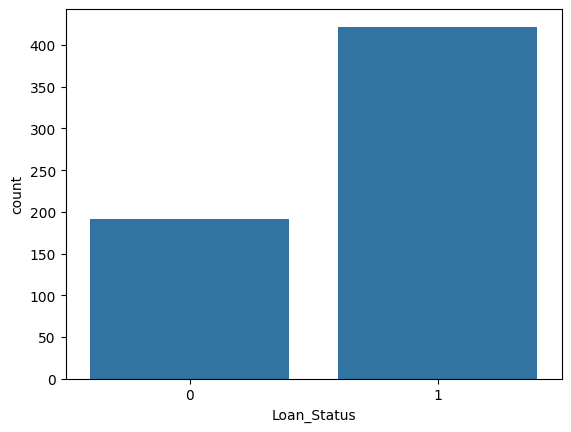

In [15]:
sns.countplot(data=df,x="Loan_Status")
print("le pourcentage des crédits accordés:",(df["Loan_Status"].value_counts()[1]/len(df))*100 )
print("le pourcentage des crédits non accordés:",(df["Loan_Status"].value_counts()[0]/len(df))*100)

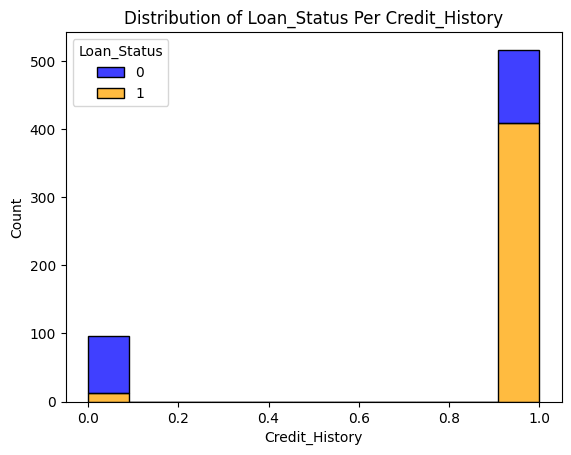

In [16]:
#b=np.linspace(df_train["Building Dimension"].min(),df_train["Building Dimension"].max(), 12)
#plt.xticks(b)
sns.histplot(data=df, hue="Loan_Status", x="Credit_History", multiple="stack", palette=["blue", "orange"]) #stack ca veut dire que qu'on incremente oui et non de claim
plt.title('Distribution of Loan_Status Per Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.show()

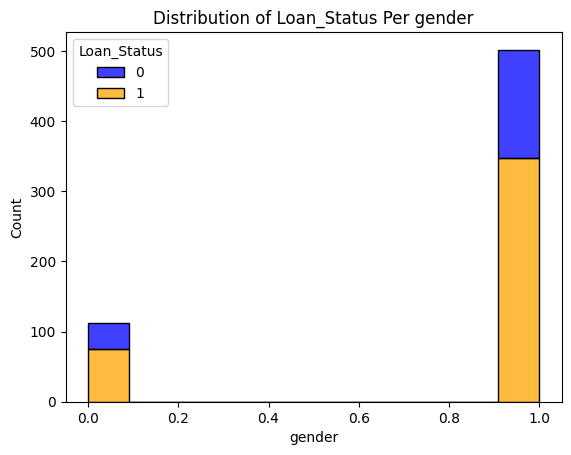

In [17]:
sns.histplot(data=df, hue="Loan_Status", x="Gender", multiple="stack", palette=["blue", "orange"]) #stack ca veut dire que qu'on incremente oui et non de claim
plt.title('Distribution of Loan_Status Per gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Loan_Status', ylabel='count'>

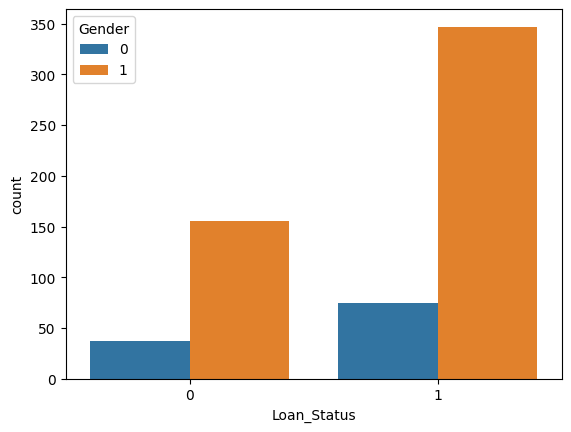

In [18]:
sns.countplot(x="Loan_Status", hue="Gender", data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

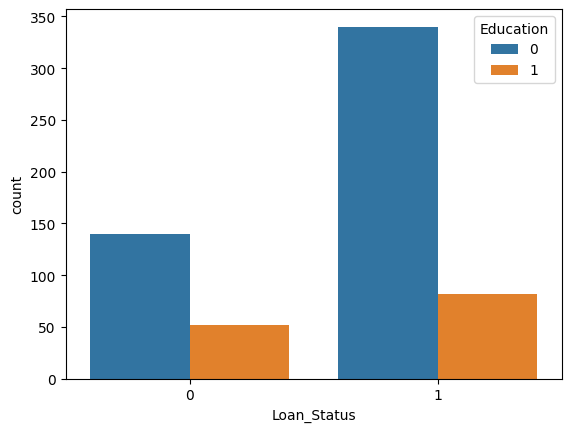

In [19]:
sns.countplot(data=df,x="Loan_Status", hue="Education")

In [20]:
df['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

<Axes: xlabel='Married', ylabel='Count'>

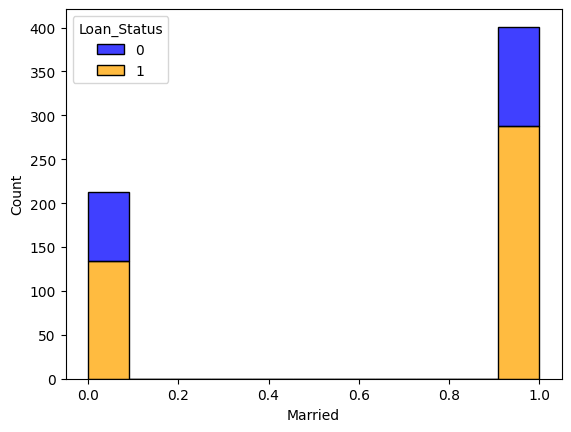

In [21]:
sns.histplot(data=df, hue="Loan_Status", x="Married", multiple="stack", palette=["blue", "orange"]) #stack ca veut dire que qu'on incremente oui et non de claim


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

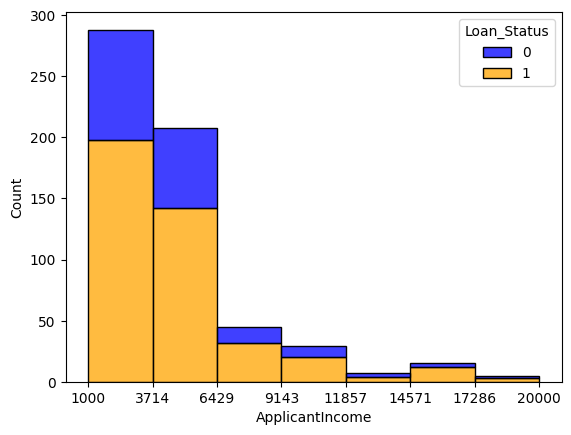

In [22]:
b=np.linspace(1000,20000,8)
plt.xticks(b)
sns.histplot(data=df, hue="Loan_Status", x="ApplicantIncome", multiple="stack",bins=b, palette=["blue", "orange"]) #stack ca veut dire que qu'on incremente oui et non de claim


In [23]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = pd.to_numeric(df['Dependents'])
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

##Model Building


In [24]:
#diviser la base de donnée en datatrain et datatest
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
for train,test in sss.split(X,Y):
  X_train,X_test=X.iloc[train],X.iloc[test]
  Y_train,Y_test=Y.iloc[train],Y.iloc[test]
print("X_train taille:",X_train.shape)
print("X_test taille:",X_test.shape)
print("Y_train taille:",Y_train.shape)
print("Y_test taille:",Y_test.shape)

X_train taille: (491, 11)
X_test taille: (123, 11)
Y_train taille: (491,)
Y_test taille: (123,)


In [25]:
#on va appliquer ici 3 algorithmes decision Tree , knn, logistic regression
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
        }

# la fonction de precision
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'la precision de modele est:{acc}')
#c'est la fct d'app des modeles
def train_test_eval(models,X_train,Y_train,X_test,Y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,Y_train)
    accu(Y_test,model.predict(X_test))
    print('-'*30)
train_test_eval(models,X_train,Y_train,X_test,Y_test)

LogisticRegression :
la precision de modele est:0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision de modele est:0.6504065040650406
------------------------------
DecisionTreeClassifier :
la precision de modele est:0.8455284552845529
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
X_2=df[['Credit_History','Married','CoapplicantIncome']]

In [27]:
#diviser la base de donnée en datatrain et datatest
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

Y=df.iloc[:,-1]
for train,test in sss.split(X_2,Y):
  X_train,X_test=X.iloc[train],X.iloc[test]
  Y_train,Y_test=Y.iloc[train],Y.iloc[test]
print("X_train taille:",X_train.shape)
print("X_test taille:",X_test.shape)
print("Y_train taille:",Y_train.shape)
print("Y_test taille:",Y_test.shape)

X_train taille: (491, 11)
X_test taille: (123, 11)
Y_train taille: (491,)
Y_test taille: (123,)


In [28]:
train_test_eval(models,X_train,Y_train,X_test,Y_test)

LogisticRegression :
la precision de modele est:0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision de modele est:0.6504065040650406
------------------------------
DecisionTreeClassifier :
la precision de modele est:0.8455284552845529
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#on va appliquer la regression logistique
Classifier=LogisticRegression()
Classifier.fit(X_2,Y)

LogisticRegression()

In [30]:
#enregistrer le modele
pickle.dump(Classifier,open('model.pkl','wb'))